In [26]:
import pandas as pd
df = pd.read_excel('HealthSurvey.xlsx')


In [27]:
df.columns

Index(['Record Num', 'Gender', 'Age', 'Height', 'Weight',
       'Family_Member_Overweight', 'High_Calorie_Intake', 'Eat_Vegetables',
       'Num_Daily_Meals', 'Between_Meals', 'Smoker', 'Daily_Water',
       'Calories_Monitored', 'Physical_Activity', 'Time_Using_Tech',
       'Alcohol_Frequency', 'Transportation', 'BMI', 'Classification'],
      dtype='object')

In [28]:
summary_bmi = df['BMI'].describe()
print(summary_bmi)

count    622.000000
mean      25.130887
std        6.130625
min       14.189108
25%       19.531250
50%       25.370362
75%       29.377948
max       45.179103
Name: BMI, dtype: float64


In [70]:
import pandas as pd
import numpy as np
from scipy import stats

# Assuming df is your DataFrame containing the BMI data
# Replace 'your_column_name' with the actual column name if needed

# Calculate Mean
mean_bmi = df['BMI'].mean()

# Calculate Standard Error
se_bmi = stats.sem(df['BMI'])

# Calculate Median
median_bmi = df['BMI'].median()

# Calculate Mode
mode_bmi = df['BMI'].mode()

# Calculate Standard Deviation
std_dev_bmi = df['BMI'].std()

# Calculate Sample Variance
variance_bmi = df['BMI'].var()

# Calculate Kurtosis
kurtosis_bmi = df['BMI'].kurtosis()

# Calculate Skewness
skewness_bmi = df['BMI'].skew()

# Calculate Range
range_bmi = df['BMI'].max() - df['BMI'].min()

# Calculate Minimum
min_bmi = df['BMI'].min()

# Calculate Maximum
max_bmi = df['BMI'].max()

# Calculate Sum
sum_bmi = df['BMI'].sum()

# Calculate Count
count_bmi = df['BMI'].count()

# Calculate Confidence Level (95%) values
conf_interval = stats.t.interval(0.95, count_bmi - 1, loc=mean_bmi, scale=se_bmi)

# Print the results
print(f"Mean BMI: {mean_bmi:.2f}")
print(f"Standard Error of BMI: {se_bmi:.2f}")
print(f"Median BMI: {median_bmi:.2f}")
print(f"Mode BMI: {mode_bmi[0]:.2f}")
print(f"Standard Deviation of BMI: {std_dev_bmi:.2f}")
print(f"Sample Variance of BMI: {variance_bmi:.2f}")
print(f"Kurtosis of BMI: {kurtosis_bmi:.2f}")
print(f"Skewness of BMI: {skewness_bmi:.2f}")
print(f"Range of BMI: {range_bmi:.2f}")
print(f"Minimum BMI: {min_bmi:.2f}")
print(f"Maximum BMI: {max_bmi:.2f}")
print(f"Sum of BMI: {sum_bmi:.2f}")
print(f"Count of BMI: {count_bmi}")
print(f"95% Confidence Interval of BMI: ({conf_interval[0]:.2f}, {conf_interval[1]:.2f})")


Mean BMI: 25.13
Standard Error of BMI: 0.25
Median BMI: 25.37
Mode BMI: 17.94
Standard Deviation of BMI: 6.13
Sample Variance of BMI: 37.58
Kurtosis of BMI: 0.23
Skewness of BMI: 0.55
Range of BMI: 30.99
Minimum BMI: 14.19
Maximum BMI: 45.18
Sum of BMI: 15631.41
Count of BMI: 622
95% Confidence Interval of BMI: (24.65, 25.61)


In [71]:
import pandas as pd

# Assuming df is your DataFrame containing the BMI data
# Replace 'your_column_name' with the actual column name if needed

# Define the bins for BMI values
bins = [15, 20, 25, 30, 35, 40, 45]

# Create a frequency table with specified bins
frequency_table = pd.cut(df['BMI'], bins=bins).value_counts().reset_index()
frequency_table.columns = ['BMI Range', 'Frequency']

# Calculate cumulative frequency and cumulative percentage
frequency_table['Cumulative Frequency'] = frequency_table['Frequency'].cumsum()
frequency_table['Cumulative Percentage'] = (frequency_table['Cumulative Frequency'] / len(df)) * 100

# Add a row for "More" category
more_row = pd.DataFrame({'BMI Range': ['More'], 'Frequency': [len(df) - frequency_table['Frequency'].sum()]})
frequency_table = pd.concat([frequency_table, more_row], ignore_index=True)

# Display the frequency distribution table
print(frequency_table)


  BMI Range  Frequency  Cumulative Frequency  Cumulative Percentage
0  (25, 30]        195                 195.0              31.350482
1  (15, 20]        161                 356.0              57.234727
2  (20, 25]        126                 482.0              77.491961
3  (30, 35]        112                 594.0              95.498392
4  (40, 45]         13                 607.0              97.588424
5  (35, 40]         12                 619.0              99.517685
6      More          3                   NaN                    NaN


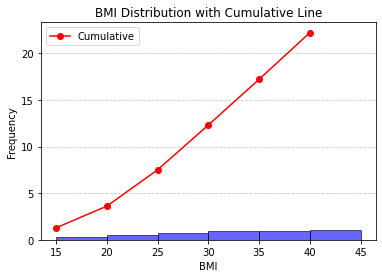

In [72]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming df is your DataFrame containing the BMI data
# Replace 'your_column_name' with the actual column name if needed

# Define the bins for BMI values
bins = [15, 20, 25, 30, 35, 40, 45]

# Create the histogram
plt.hist(df['BMI'], bins=bins, edgecolor='black', cumulative=True, density=True, alpha=0.6, color='blue')

# Add a cumulative line
n, bins, patches = plt.hist(df['BMI'], bins=bins, edgecolor='black', cumulative=True, density=True, alpha=0)
cumulative_values = np.cumsum(n) * np.diff(bins)
plt.plot(bins[:-1], cumulative_values, marker='o', linestyle='-', color='red', label='Cumulative')

# Add labels and title
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.title('BMI Distribution with Cumulative Line')
plt.legend()

# Show the plot
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


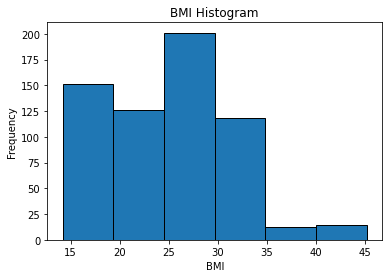

           BMI  Frequency
0    17.941817          9
1    25.390625          8
2    25.945484          7
3    26.234568          6
4    17.578125          6
..         ...        ...
424  28.734694          1
425  35.379578          1
426  24.323229          1
427  17.146776          1
428  26.271345          1

[429 rows x 2 columns]


In [69]:
import matplotlib.pyplot as plt

# Assuming your data is in a DataFrame called df
# Create a frequency distribution table
frequency_table = df['BMI'].value_counts().reset_index()
frequency_table.columns = ['BMI', 'Frequency']

# Create a histogram
plt.hist(df['BMI'], bins=6, edgecolor='k')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.title('BMI Histogram')
plt.show()

# Display the frequency table
print(frequency_table)

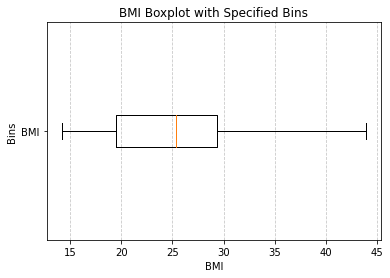

In [73]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the BMI data
# Replace 'your_column_name' with the actual column name if needed

# Define the bins for BMI values
bins = [15, 20, 25, 30, 35, 40, 45]

# Create a boxplot
plt.boxplot([df['BMI']], vert=False, labels=['BMI'], showfliers=False)

# Add labels and title
plt.xlabel('BMI')
plt.ylabel('Bins')
plt.title('BMI Boxplot with Specified Bins')

# Set the x-axis ticks to match the bin boundaries
plt.xticks(bins)

# Show the plot
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


In [29]:
# Calculate mean BMI
mean_bmi = df['BMI'].mean()
print(f"Average BMI: {mean_bmi}")


Average BMI: 25.130886890886046


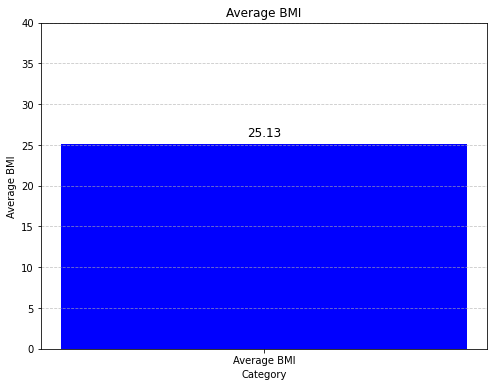

In [42]:

# Calculate the average BMI
average_bmi = df['BMI'].mean()

# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(['Average BMI'], [average_bmi], color='blue')
plt.xlabel('Category')
plt.ylabel('Average BMI')
plt.title('Average BMI')
plt.ylim(0, 40)  # Adjust the y-axis limits as needed
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the average BMI value on top of the bar
plt.text('Average BMI', average_bmi + 0.5, f'{average_bmi:.2f}', ha='center', va='bottom', fontsize=12)

plt.show()

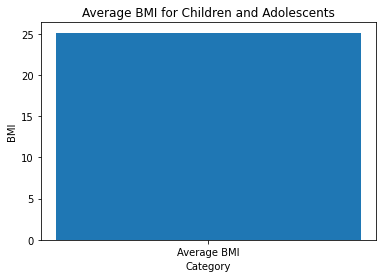

In [74]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the BMI data
# Calculate the average BMI
average_bmi = df['BMI'].mean()

# Create a bar chart
plt.bar(['Average BMI'], [average_bmi])

# Add labels and title
plt.xlabel('Category')
plt.ylabel('BMI')
plt.title('Average BMI for Children and Adolescents')

# Show the plot
plt.show()


In [30]:
# Define BMI categories
overweight_or_obese = df['BMI'] >= 25

# Calculate proportion of overweight or obese individuals
proportion_overweight_or_obese = len(df[overweight_or_obese]) / len(df) * 100
print(f"Proportion Overweight or Obese: {proportion_overweight_or_obese}%")


Proportion Overweight or Obese: 53.536977491961416%


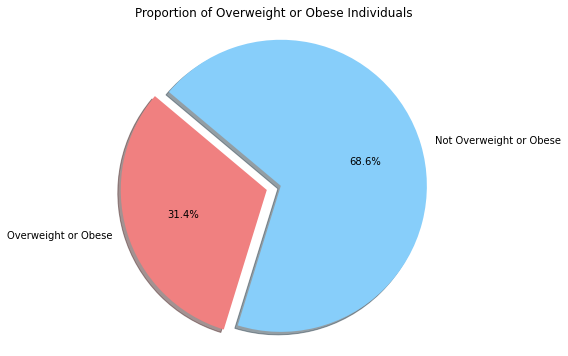

In [44]:
# Calculate the proportion of individuals who are overweight or obese
overweight_or_obese = df[df['Classification'].isin(['Overweight', 'Obese'])]
proportion_overweight_or_obese = len(overweight_or_obese) / len(df) * 100

# Calculate the proportion of individuals who are not overweight or obese
proportion_not_overweight_or_obese = 100 - proportion_overweight_or_obese

# Create a pie chart
labels = ['Overweight or Obese', 'Not Overweight or Obese']
sizes = [proportion_overweight_or_obese, proportion_not_overweight_or_obese]
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)  # Explode the first slice (Overweight or Obese)

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Proportion of Overweight or Obese Individuals')

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()




In [82]:
import numpy as np
import scipy.stats as stats

# Define the data
sample_size = len(df)  # Total number of samples
count_overweight_obese = len(df[df['Classification'].isin(['Overweight', 'Obesity I', 'Obesity II', 'Obesity III'])])  # Number of overweight/obese individuals
print(sample_size)
# Calculate the sample proportion (p-hat)
sample_proportion = count_overweight_obese / sample_size

# Define the confidence level (e.g., 95%)
confidence_level = 0.95

# Calculate the Z-value for the desired confidence level
z_value = stats.norm.ppf(1 - (1 - confidence_level) / 2)

# Calculate the standard error of the proportion
standard_error = np.sqrt((sample_proportion * (1 - sample_proportion)) / sample_size)

# Calculate the margin of error
margin_of_error = z_value * standard_error

# Calculate the lower and upper limits of the confidence interval
interval_lower_limit = sample_proportion - margin_of_error
interval_upper_limit = sample_proportion + margin_of_error

# Print the results
print(f"Sample Proportion (p-hat): {sample_proportion:.4f}")
print(f"Z Value: {z_value:.2f}")
print(f"Standard Error: {standard_error:.4f}")
print(f"Margin of Error: {margin_of_error:.4f}")
print(f"Confidence Interval Lower Limit: {interval_lower_limit:.4f}")
print(f"Confidence Interval Upper Limit: {interval_upper_limit:.4f}")


622
Sample Proportion (p-hat): 0.5354
Z Value: 1.96
Standard Error: 0.0200
Margin of Error: 0.0392
Confidence Interval Lower Limit: 0.4962
Confidence Interval Upper Limit: 0.5746


In [84]:
import pandas as pd

# Assuming you have a DataFrame named df
# Replace 'Classification' with the column you want to count successes for

count_of_successes = len(df[df['Classification'].isin(['Overweight', 'Obesity I', 'Obesity II', 'Obesity III'])])
print(count_of_successes)


333


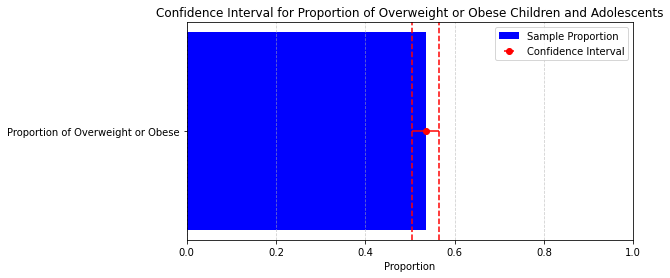

In [77]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
confidence_level = 0.95  # Adjust as needed
sample_proportion = 0.535  # Replace with your calculated sample proportion
margin_of_error = 0.03  # Replace with your calculated margin of error

# Calculate the lower and upper limits of the confidence interval
lower_limit = sample_proportion - margin_of_error
upper_limit = sample_proportion + margin_of_error

# Create a horizontal bar graph to represent the confidence interval
plt.figure(figsize=(8, 4))
plt.barh(y=['Proportion of Overweight or Obese'], width=sample_proportion, color='blue', label='Sample Proportion')
plt.errorbar(x=[sample_proportion], y=['Proportion of Overweight or Obese'],
             xerr=margin_of_error, fmt='ro', label='Confidence Interval')
plt.axvline(x=lower_limit, color='red', linestyle='--')
plt.axvline(x=upper_limit, color='red', linestyle='--')

# Add labels and title
plt.xlabel('Proportion')
plt.title('Confidence Interval for Proportion of Overweight or Obese Children and Adolescents')

# Set x-axis limits
plt.xlim(0, 1)

# Add a legend
plt.legend()

# Show the plot
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()


In [31]:
# Assuming 'Physical_Activity' is the column containing physical activity data
# Create a summary table of physical activity
summary_physical_activity = df['Physical_Activity'].describe()
print(summary_physical_activity)


count             622
unique              4
top       1 or 2 days
freq              233
Name: Physical_Activity, dtype: object


In [93]:
import pandas as pd

# Sample data
data = {
    'Physical_Activity': [
        '3 to 5 days', '1 or 2 days', '0 days', '1 or 2 days', '3 to 5 days',
        '3 to 5 days', '1 or 2 days', '0 days', '1 or 2 days', '3 to 5 days'
    ]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Create a frequency table for 'Physical_Activity'
frequency_table = df['Physical_Activity'].value_counts().reset_index()
frequency_table.columns = ['Activity', 'Frequency']

# Print the frequency table
print(frequency_table)


      Activity  Frequency
0  3 to 5 days          4
1  1 or 2 days          4
2       0 days          2


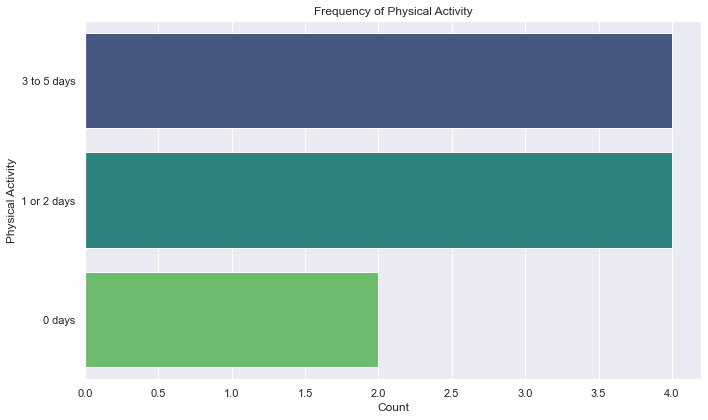

In [95]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data
data = {
    'Physical_Activity': [
        '3 to 5 days', '1 or 2 days', '0 days', '1 or 2 days', '3 to 5 days',
        '3 to 5 days', '1 or 2 days', '0 days', '1 or 2 days', '3 to 5 days'
    ]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Create a count plot (bar plot) for 'Physical_Activity'
plt.figure(figsize=(10, 6))
sns.set(style='darkgrid')  # Set the style of the plot
sns.countplot(data=df, y='Physical_Activity', palette='viridis')
plt.xlabel('Count')
plt.ylabel('Physical Activity')
plt.title('Frequency of Physical Activity')
plt.tight_layout()

# Show the plot
plt.show()


In [32]:
# Differences among gender in terms of physical activity
gender_physical_activity = df.groupby('Gender')['Physical_Activity'].value_counts()

# Differences in BMI based on physical activity
bmi_physical_activity = df.groupby('Physical_Activity')['BMI'].mean()

# Output these differences
print("Differences Among Gender in Physical Activity:")
print(gender_physical_activity)
print("\nDifferences in BMI Based on Physical Activity:")
print(bmi_physical_activity)


Differences Among Gender in Physical Activity:
Gender  Physical_Activity
Female  1 or 2 days          120
        0 days                92
        3 to 5 days           79
        6 or 7 days           20
Male    3 to 5 days          104
        1 or 2 days          103
        0 days                49
        6 or 7 days           26
Other   3 to 5 days           13
        1 or 2 days           10
        0 days                 4
        6 or 7 days            2
Name: Physical_Activity, dtype: int64

Differences in BMI Based on Physical Activity:
Physical_Activity
0 days         24.724649
1 or 2 days    27.094927
3 to 5 days    23.456553
6 or 7 days    23.661151
Name: BMI, dtype: float64


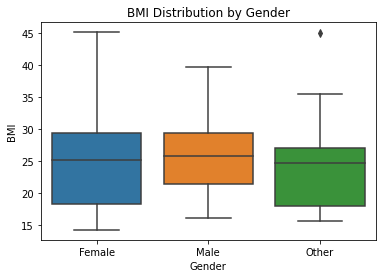

In [46]:
import seaborn as sns

# Assuming you want to compare BMI by gender
sns.boxplot(x='Gender', y='BMI', data=df)
plt.xlabel('Gender')
plt.ylabel('BMI')
plt.title('BMI Distribution by Gender')
plt.show()


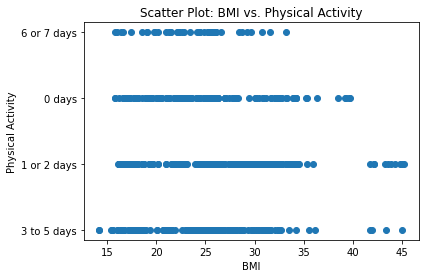

In [45]:
# Assuming you want to create a scatter plot for BMI vs. Physical Activity
plt.scatter(df['BMI'], df['Physical_Activity'])
plt.xlabel('BMI')
plt.ylabel('Physical Activity')
plt.title('Scatter Plot: BMI vs. Physical Activity')
plt.show()


In [60]:
import statsmodels.api as sm

# Add a constant (intercept) to the independent variable (Age)
X = sm.add_constant(df['Age'])

# Dependent variable (BMI)
y = df['BMI']

# Fit a linear regression model
model = sm.OLS(y, X).fit()

# Get the summary of the regression results
summary = model.summary()

# Print the summary
print(summary)


                            OLS Regression Results                            
Dep. Variable:                    BMI   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.998
Date:                Mon, 11 Sep 2023   Prob (F-statistic):              0.158
Time:                        14:39:43   Log-Likelihood:                -2008.9
No. Observations:                 622   AIC:                             4022.
Df Residuals:                     620   BIC:                             4031.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.1467      4.240      4.515      0.0

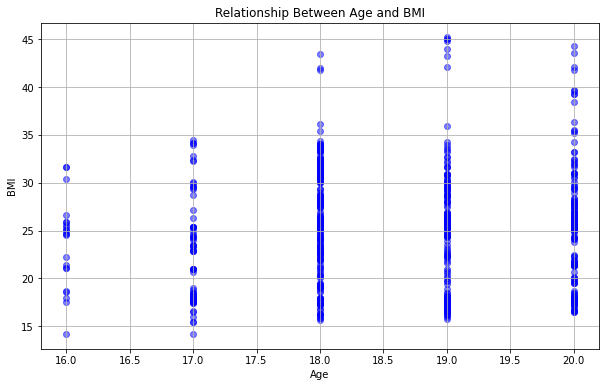

In [65]:
# Create a scatter plot to visualize the relationship between age and BMI
plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['BMI'], alpha=0.5, color='b')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.title('Relationship Between Age and BMI')
plt.grid(True)

plt.show()

In [50]:
# Assuming 'Age' is the column containing age data
# Check if children and adolescents are, on average, classified as overweight or obese (BMI >= 25)
average_bmi_classification = (df['BMI'] >= 25).mean() * 100
print(f"Percentage of Children and Adolescents Classified as Overweight or Obese: {average_bmi_classification}%")


Percentage of Children and Adolescents Classified as Overweight or Obese: 53.536977491961416%


In [51]:
# Assuming you want to create a contingency table for Gender vs. Family_Member_Overweight
cross_tab = pd.crosstab(df['Gender'], df['Family_Member_Overweight'])
print(cross_tab)


Family_Member_Overweight   No  Yes
Gender                            
Female                    150  161
Male                       57  225
Other                      10   19


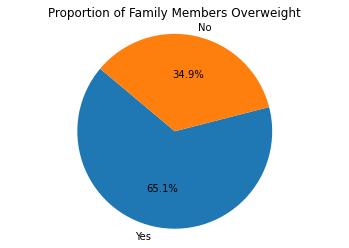

In [61]:
# Assuming you want to create a pie chart for Family_Member_Overweight
labels = df['Family_Member_Overweight'].value_counts().index
sizes = df['Family_Member_Overweight'].value_counts().values

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Proportion of Family Members Overweight')
plt.show()


In [63]:
import scipy.stats as stats

# Create a contingency table as a DataFrame
import pandas as pd
data = {'Family_Member_Overweight': ['No', 'Yes', 'No', 'Yes', 'No', 'Yes'],
        'Gender': ['Female', 'Female', 'Male', 'Male', 'Other', 'Other'],
        'Count': [150, 161, 57, 225, 10, 19]}
contingency_table = pd.DataFrame(data)

# Pivot the table for the chi-squared test
pivot_table = pd.pivot_table(contingency_table, values='Count', index='Gender', columns='Family_Member_Overweight', aggfunc='sum')

# Perform the chi-squared test
chi2, p, dof, expected = stats.chi2_contingency(pivot_table)

# Print the results
print("Chi-Squared Statistic:", chi2)
print("P-Value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies Table:")
print(expected)

# Interpret the results
alpha = 0.05  # Significance level
if p < alpha:
    print("There is a significant association between gender and family member overweight status.")
else:
    print("There is no significant association between gender and family member overweight status.")


Chi-Squared Statistic: 51.11364092949622
P-Value: 7.958182552054029e-12
Degrees of Freedom: 2
Expected Frequencies Table:
[[108.5        202.5       ]
 [ 98.38263666 183.61736334]
 [ 10.11736334  18.88263666]]
There is a significant association between gender and family member overweight status.


In [64]:
# Calculate the average BMI
average_bmi = df['BMI'].mean()

# Define the BMI threshold
bmi_threshold = 25

# Compare the average BMI to the threshold
if average_bmi >= bmi_threshold:
    print(f"The average BMI of children and adolescents is {average_bmi:.2f}, which means they are classified as overweight or obese (BMI >= {bmi_threshold}).")
else:
    print(f"The average BMI of children and adolescents is {average_bmi:.2f}, which means they are not classified as overweight or obese (BMI < {bmi_threshold}).")


The average BMI of children and adolescents is 25.13, which means they are classified as overweight or obese (BMI >= 25).


In [52]:
# Define a function to check if a value represents more than 3 meals
def is_more_than_3_meals(value):
    if isinstance(value, str):
        return "more than 3" in value.lower()
    elif isinstance(value, int) and value > 3:
        return True
    else:
        return False

# Filter the rows where Num_Daily_Meals represents more than 3 meals
more_than_3_meals = df[df['Num_Daily_Meals'].apply(is_more_than_3_meals)]

# Calculate the proportion
proportion_more_than_3_meals = len(more_than_3_meals) / len(df)

# Print the proportion
print(f"Proportion of children and adolescents eating more than 3 meals a day: {proportion_more_than_3_meals:.2%}")

Proportion of children and adolescents eating more than 3 meals a day: 13.99%


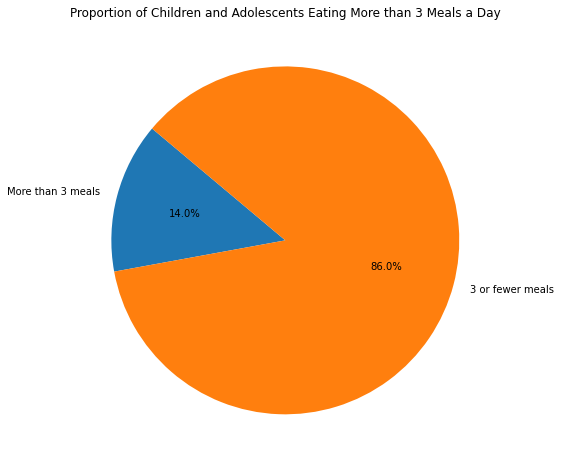

In [54]:

# Define labels for the pie chart
labels = ['More than 3 meals', '3 or fewer meals']

# Count the number of rows in each category
count_more_than_3_meals = len(more_than_3_meals)
count_3_or_fewer_meals = len(df) - count_more_than_3_meals

# Create data for the pie chart
data = [count_more_than_3_meals, count_3_or_fewer_meals]

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(data, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Children and Adolescents Eating More than 3 Meals a Day')

plt.show()



In [35]:
from statsmodels.stats.power import TTestIndPower

# Create an instance of the TTestIndPower class
power_analysis = TTestIndPower()

# Define parameters for sample size calculation
effect_size_bmi = desired_margin_of_error_bmi  # Effect size is set to the desired margin of error for BMI
alpha = 0.05  # Significance level
power = 0.95  # Desired power level

# Perform sample size calculation for BMI
sample_size_bmi = power_analysis.solve_power(effect_size=effect_size_bmi, alpha=alpha, power=power,
                                             alternative='two-sided')

# Define parameters for sample size calculation for physical activity
effect_size_physical_activity = desired_margin_of_error_physical_activity / 100  # Convert percentage to decimal
# Perform sample size calculation for physical activity
sample_size_physical_activity = power_analysis.solve_power(effect_size=effect_size_physical_activity, alpha=alpha, power=power,
                                                           alternative='two-sided')

print(f"Required Sample Size for BMI: {sample_size_bmi:.0f}")
print(f"Required Sample Size for Physical Activity: {sample_size_physical_activity:.0f}")


Required Sample Size for BMI: 27
Required Sample Size for Physical Activity: 28878


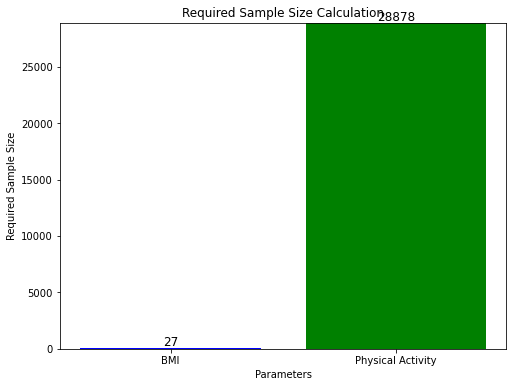

In [55]:
# Define parameters
parameters = ['BMI', 'Physical Activity']
sample_sizes = [sample_size_bmi, sample_size_physical_activity]

# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(parameters, sample_sizes, color=['blue', 'green'])
plt.xlabel('Parameters')
plt.ylabel('Required Sample Size')
plt.title('Required Sample Size Calculation')
plt.ylim(min(sample_sizes) - 50, max(sample_sizes) + 50)  # Adjust the y-axis limits for better visualization

# Add labels to the bars
for i, sample_size in enumerate(sample_sizes):
    plt.text(i, sample_size + 10, f'{sample_size:.0f}', ha='center', va='bottom', fontsize=12)

plt.show()

In [96]:
import scipy.stats as st
import numpy as np

# Parameters for average BMI estimation
desired_margin_bmi = 1  # Desired margin of error for average BMI
std_dev_bmi = 6  # Standard deviation of BMI (example value)
confidence_level_bmi = 0.95  # Confidence level (e.g., 0.95 for 95% confidence)

# Parameters for proportion estimation
desired_margin_proportion = 0.03  # Desired margin of error for proportion (3%)
p_hat = 0.5  # Estimated proportion (example value, should be based on historical data)
confidence_level_proportion = 0.95  # Confidence level (e.g., 0.95 for 95% confidence)

# Calculate required sample size for average BMI
z_bmi = st.norm.ppf((1 + confidence_level_bmi) / 2)
required_sample_size_bmi = ((z_bmi * std_dev_bmi) / desired_margin_bmi) ** 2

# Calculate required sample size for proportion
z_proportion = st.norm.ppf((1 + confidence_level_proportion) / 2)
required_sample_size_proportion = ((z_proportion * np.sqrt(p_hat * (1 - p_hat))) / desired_margin_proportion) ** 2

print(f"Required Sample Size for BMI: {int(np.ceil(required_sample_size_bmi))}")
print(f"Required Sample Size for Physical Activity: {int(np.ceil(required_sample_size_proportion))}")


Required Sample Size for BMI: 139
Required Sample Size for Physical Activity: 1068


In [97]:
import numpy as np
import scipy.stats as stats

# Define desired margin of error (in proportion, e.g., 0.03 for 3%)
desired_margin = 0.03

# Define desired confidence level (e.g., 0.95 for 95% confidence)
confidence_level = 0.95

# Calculate the critical value corresponding to the confidence level
z_critical = stats.norm.ppf((1 + confidence_level) / 2)

# Calculate the required sample size for a proportion
required_sample_size = (z_critical**2 * 0.25) / (desired_margin**2)

# Round up to the nearest integer (since sample size must be a whole number)
required_sample_size = np.ceil(required_sample_size)

print(f"Required Sample Size: {int(required_sample_size)}")


Required Sample Size: 1068


In [98]:
import numpy as np
import scipy.stats as stats

# Define desired confidence level (e.g., 0.95 for 95% confidence)
confidence_level = 0.95

# Calculate the critical value corresponding to the confidence level
z_critical = stats.norm.ppf((1 + confidence_level) / 2)

# Calculate the desired margin for a proportion
desired_margin = (z_critical**2) / (4 * required_sample_size)

print(f"Desired Margin for Proportion: {desired_margin:.4f}")


Desired Margin for Proportion: 0.0009


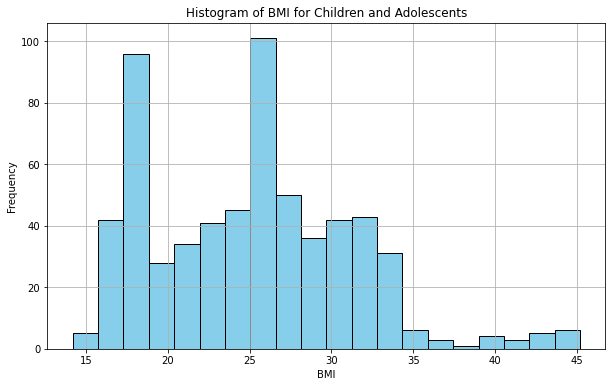

In [56]:
# Plot a histogram for BMI
plt.figure(figsize=(10, 6))
plt.hist(df['BMI'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.title('Histogram of BMI for Children and Adolescents')
plt.grid(True)
plt.show()

In [99]:
import numpy as np
import scipy.stats as stats

# Define desired confidence level (e.g., 0.95 for 95% confidence)
confidence_level = 0.95

# Calculate the critical value corresponding to the confidence level
z_critical = stats.norm.ppf((1 + confidence_level) / 2)

# Calculate the desired margin for a proportion
desired_margin = (z_critical**2) / (4 * required_sample_size)

# Print the desired margin for proportion
print(f"Desired Margin for Proportion: {desired_margin:.4f}")


Desired Margin for Proportion: 0.0009
